## 1. Data Cleaning:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Indian_Earthquakes_List_Update_Magnitudes.csv",
                skiprows=13,
                encoding='latin1',
                names=["Year",
                      "Month",
                      "Date",
                      "Origin_Time_UTC",
                      "Origin_Time_IST",
                      "Magnitude_Mw_1",
                      "Magnitude_Mw",
                      "Magnitude_Mb_1",
                      "Magnitude_Mb_2",
                      "Magnitude_Ms",
                      "Magnitude_Ml",
                      "Latitude_N",
                      "Longitude_E",
                      "Depth_KM",
                      "Intensity_MM",
                      "Intensity_MMI",
                      "Intensity_MME",
                      "Location",
                      "Reference"],
                dtype={"Origin_Time_UTC": np.str,
                     "Origin_Time_IST": np.str,
                     #"Magnitude_Mw_1": np.float32,
                     #"Magnitude_Mw": np.float32,
                     #"Magnitude_Mb_1": np.float32,
                     #"Magnitude_Mb_2": np.float32,
                     #"Magnitude_Ms": np.float32,
                     #"Magnitude_Ml": np.float32,
                     #"Latitude_N": np.float32,
                     #"Longitude_E": np.float32,
                     #"Depth_KM": np.float32,
                     "Intensity_MM": np.str,
                     "Intensity_MMI": np.str,
                     "Intensity_MME": np.str,
                     "Location": np.str,
                     "Reference": np.str})
df.reset_index(inplace=True)
df.index.name = 'SN'
df["Month"].fillna(value=1, inplace=True)
df["Date"].fillna(value=1, inplace=True)
df["Year"] = df.Year.astype(np.int32)
df["Month"] = df["Month"].replace([' '], 1)
df["Month"] = df.Month.astype(np.int32)
df["Month"] = df["Month"].replace([0], 1)
df["Date"] = df.Date.astype(np.int32)
df["Date"] = df["Date"].replace([0], 1)
df['Latitude_N'] = df['Latitude_N'].map(lambda x: str(x).rstrip('NSEW? -'))
df['Longitude_E'] = df['Longitude_E'].map(lambda x: str(x).rstrip('NSEW? -'))
df['Latitude_N'] = df['Latitude_N'].replace('\u00b0','', regex=True)     #to remove the degree symbol
df['Longitude_E'] = df['Longitude_E'].replace('\u00b0','', regex=True)
df['Latitude_N'] = df['Latitude_N'].replace(',','',regex=True)
df['Longitude_E'] = df['Longitude_E'].replace(',','',regex=True)
df.drop(df.index[df["Magnitude_Mw"] == "#VALUE!"], inplace=True)
df["Magnitude_Mw"] = df.Magnitude_Mw.astype(np.float32)
df.drop(["index", "Origin_Time_UTC", "Origin_Time_IST", "Magnitude_Mw_1", "Magnitude_Mb_1", "Magnitude_Mb_2", "Magnitude_Ms", "Magnitude_Ml", "Intensity_MM", "Intensity_MMI", "Intensity_MME", "Location"], inplace=True, axis=1)
print(df.shape)
df.head(20)

/home/subodhsondkar/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,7,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(52984, 8)


,Year,Month,Date,Magnitude_Mw,Latitude_N,Longitude_E,Depth_KM,Reference
SN,,,,,,,,
0,25,1,1,7.5000,72.9,33.72,0.0,Dr STGR
1,26,5,10,6.1397,17.3,80.1,NaN,NEIC
2,26,5,10,6.1397,26.0,97.0,80.0,G-R
3,50,1,1,7.0000,69.5,37.1,0.0,Dr STGR
4,110,1,1,6.5000,76.47,18.1,0.0,Dr STGR
5,250,1,1,8.5000,74.5,34.6,0.0,Dr STGR
6,260,1,1,8.0000,77.2,30.5,0.0,Dr STGR
7,819,6,1,7.3000,65.4,36.4,0.0,Dr STGR
8,825,1,1,8.0000,91.8,26.1,0.0,Dr STGR


In [3]:
# Creating Binary Columns according to thresholds
# Considering 5 Threshold values {4,4.3,4.5,4.7,5}    

df['Threshold_4'] = df['Magnitude_Mw'].gt(4).astype(int)
df['Threshold_4.3'] = df['Magnitude_Mw'].gt(4.3).astype(int)
df['Threshold_4.5'] = df['Magnitude_Mw'].gt(4.5).astype(int)
df['Threshold_4.7'] = df['Magnitude_Mw'].gt(4.7).astype(int)
df['Threshold_5'] = df['Magnitude_Mw'].gt(5).astype(int)

df.tail()

,Year,Month,Date,Magnitude_Mw,Latitude_N,Longitude_E,Depth_KM,Reference,Threshold_4,Threshold_4.3,Threshold_4.5,Threshold_4.7,Threshold_5
SN,,,,,,,,,,,,,
52982,2019,7,28,3.2,32.8,78.4,10.0,NaN,0,0,0,0,0
52983,2019,7,28,3.6,25.5,90.4,70.0,NaN,0,0,0,0,0
52984,2019,7,28,4.0,23.2,86.5,22.0,NaN,0,0,0,0,0
52985,2019,7,29,4.3,32.8,76.4,20.0,NaN,1,0,0,0,0
52986,2019,7,31,3.0,20.0,72.8,10.0,NaN,0,0,0,0,0


In [4]:
timestamps = []
for index, row in df.iterrows():
    s = ""
    if row.Year < 0:
        s += "-"
        for i in range(5 - len(str(row.Year))):
            s += "0"
        s += str(row.Year)[1:]
    else:
        for i in range(4 - len(str(row.Year))):
            s += "0"
        s += str(row.Year)
    if row.Month < 10:
        s += "0"
    s += str(row.Month)
    if row.Date < 10:
        s += "0"
    s += str(row.Date)
    timestamps += [pd.to_datetime(s, format='%Y%m%d', errors='ignore')]
df["Timestamp"] = timestamps
df.head()

,Year,Month,Date,Magnitude_Mw,Latitude_N,Longitude_E,Depth_KM,Reference,Threshold_4,Threshold_4.3,Threshold_4.5,Threshold_4.7,Threshold_5,Timestamp
SN,,,,,,,,,,,,,,
0,25,1,1,7.5000,72.9,33.72,0.0,Dr STGR,1,1,1,1,1,0025-01-01 00:00:00
1,26,5,10,6.1397,17.3,80.1,NaN,NEIC,1,1,1,1,1,0026-05-10 00:00:00
2,26,5,10,6.1397,26.0,97.0,80.0,G-R,1,1,1,1,1,0026-05-10 00:00:00
3,50,1,1,7.0000,69.5,37.1,0.0,Dr STGR,1,1,1,1,1,0050-01-01 00:00:00
4,110,1,1,6.5000,76.47,18.1,0.0,Dr STGR,1,1,1,1,1,0110-01-01 00:00:00


In [5]:
df.drop(["Year", "Month", "Date"], inplace=True, axis=1)
df.head()

,Magnitude_Mw,Latitude_N,Longitude_E,Depth_KM,Reference,Threshold_4,Threshold_4.3,Threshold_4.5,Threshold_4.7,Threshold_5,Timestamp
SN,,,,,,,,,,,
0,7.5000,72.9,33.72,0.0,Dr STGR,1,1,1,1,1,0025-01-01 00:00:00
1,6.1397,17.3,80.1,NaN,NEIC,1,1,1,1,1,0026-05-10 00:00:00
2,6.1397,26.0,97.0,80.0,G-R,1,1,1,1,1,0026-05-10 00:00:00
3,7.0000,69.5,37.1,0.0,Dr STGR,1,1,1,1,1,0050-01-01 00:00:00
4,6.5000,76.47,18.1,0.0,Dr STGR,1,1,1,1,1,0110-01-01 00:00:00


In [6]:
df.dropna(how='any', inplace=True)
df.shape

(47641, 11)

In [7]:
df.tail(20)

,Magnitude_Mw,Latitude_N,Longitude_E,Depth_KM,Reference,Threshold_4,Threshold_4.3,Threshold_4.5,Threshold_4.7,Threshold_5,Timestamp
SN,,,,,,,,,,,
51385,2.9,22.7,77.5,10.0,IMD,0,0,0,0,0,2012-10-30 00:00:00
51386,3.5,25.8,71.2,10.0,IMD,0,0,0,0,0,2012-10-30 00:00:00
51387,4.1,32.3,76.2,5.0,IMD,1,0,0,0,0,2012-11-06 00:00:00
51388,4.3,36.9,73.5,10.0,IMD,1,0,0,0,0,2012-11-09 00:00:00
51389,6.7,23.0,95.9,10.0,IMD,1,1,1,1,1,2012-11-11 00:00:00
51390,4.0,32.3,76.2,5.0,IMD,0,0,0,0,0,2012-11-11 00:00:00
51391,2.5,30.7,78.5,5.0,IMD,0,0,0,0,0,2012-11-12 00:00:00
51392,3.5,23.3,91.5,10.0,IMD,0,0,0,0,0,2012-11-14 00:00:00
51393,3.0,30.2,80.1,5.0,IMD,0,0,0,0,0,2012-11-15 00:00:00


## 2. Prep data for training:

In [8]:
X_features=["Latitude_N","Longitude_E", "Depth_KM"]
X=df[X_features]
# Y=df["Magnitude_Mw"]
Y_features=["Threshold_4","Threshold_4.3","Threshold_4.5","Threshold_4.7","Threshold_5"]
Y=df[Y_features]

print(X.head())
print(Y.head())

   Latitude_N Longitude_E  Depth_KM
SN                                 
0        72.9       33.72       0.0
2        26.0        97.0      80.0
3        69.5        37.1       0.0
4       76.47        18.1       0.0
5        74.5        34.6       0.0
    Threshold_4  Threshold_4.3  Threshold_4.5  Threshold_4.7  Threshold_5
SN                                                                       
0             1              1              1              1            1
2             1              1              1              1            1
3             1              1              1              1            1
4             1              1              1              1            1
5             1              1              1              1            1


In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2)


## 3. KNN training and validation Model:

For  1  neighbours and  4  thresholds mean absolute error is  0.19414419141567846  and auc is  0.5255905196095748
For  1  neighbours and  4.3  thresholds mean absolute error is  0.4143141987616749  and auc is  0.5629081361803253
For  1  neighbours and  4.5  thresholds mean absolute error is  0.4173575401406234  and auc is  0.5806342275236285
For  1  neighbours and  4.7  thresholds mean absolute error is  0.37244201909959074  and auc is  0.5786171194226715
For  1  neighbours and  5  thresholds mean absolute error is  0.23349774372966733  and auc is  0.578128373377534
For  5  neighbours and  4  thresholds mean absolute error is  0.19395529436457132  and auc is  0.5807321066896117
For  5  neighbours and  4.3  thresholds mean absolute error is  0.4181341169062861  and auc is  0.6239860172737014
For  5  neighbours and  4.5  thresholds mean absolute error is  0.42587889600167905  and auc is  0.6447634251604475
For  5  neighbours and  4.7  thresholds mean absolute error is  0.3788015531535313

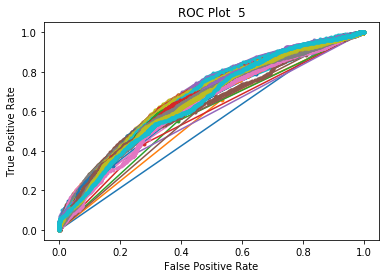

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

neighbour_cnt=[1,5,13,31,57,107,253,501,5001,10005]
threshold=[4,4.3,4.5,4.7,5]
for i in neighbour_cnt:
    for th in threshold:
        KNN_model= KNeighborsRegressor(n_neighbors=i)
        col_name="Threshold_"+str(th)
        KNN_model.fit(train_x,train_y[col_name])
        pred_y=KNN_model.predict(test_x)
        mea=mean_absolute_error(pred_y,test_y[col_name])
        knn_auc = roc_auc_score(test_y[col_name],pred_y)
        print("For ",i," neighbours and ",th," thresholds mean absolute error is ",mea," and auc is ",knn_auc)
        knn_fpr, knn_tpr, _ = roc_curve(test_y[col_name],pred_y)
        plt.plot(knn_fpr, knn_tpr, marker='.', label='Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
        plt.title('ROC Plot  '+str(th))
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
#         # Show legend
#         plt.legend() # 
#         plt.show()



Following observations can be made from results in the above cell:<br>
1.After 253 neighbours,the error seems to be converged.Hence taking more than those neighbours will not bring anything more productive.
2.With each count of neighbours considered the best result is found at threshold 4.

Overall from above observations the best results are by taking 1-57 neighbours and by taking threshold as 4.

## 4.Decision Tree Classifier:

For  10005  pre prune depth and  4  thresholds mean absolute error is  0.11480742995067689  and auc is  0.5
For  10005  pre prune depth and  4.3  thresholds mean absolute error is  0.36792947843425333  and auc is  0.6054744922845384
For  10005  pre prune depth and  4.5  thresholds mean absolute error is  0.37968307272536467  and auc is  0.6208912055686249
For  10005  pre prune depth and  4.7  thresholds mean absolute error is  0.32259418616853813  and auc is  0.5131753231194912
For  10005  pre prune depth and  5  thresholds mean absolute error is  0.15814880889914995  and auc is  0.5312153165347969
For  10005  pre prune depth and  4  thresholds mean absolute error is  0.11491237275684751  and auc is  0.4999407231772377
For  10005  pre prune depth and  4.3  thresholds mean absolute error is  0.3593241683282611  and auc is  0.572230886528802
For  10005  pre prune depth and  4.5  thresholds mean absolute error is  0.36362682338125724  and auc is  0.6270103744182085
For  10005  pre prune d

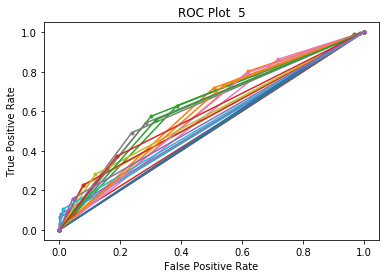

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

ppd = [3, 5, 8, 10, 15]
threshold=[4,4.3,4.5,4.7,5]

for depth in ppd:
    for th in threshold:
        model = DecisionTreeClassifier(random_state=0, max_depth=depth)
        col_name="Threshold_"+str(th)
        model.fit(train_x,train_y[col_name])
        pred_y=model.predict(test_x)
        mea=mean_absolute_error(pred_y,test_y[col_name])
        auc = roc_auc_score(test_y[col_name],pred_y)
        print("For ",i," pre prune depth and ",th," thresholds mean absolute error is ",mea," and auc is ",auc)
        fpr, tpr, _ = roc_curve(test_y[col_name],pred_y)
        plt.plot(fpr, tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % auc)
        plt.title('ROC Plot  '+str(th))
        # Axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

On comparing the results from above cell with that of KNN,following observations can be made:<br>
1.The area under curve is maximum for threshold 5. Hence for decision tree classification works best with threshold 5.<br>
2.For each threshold value the average error is less than the respective errors in KNN.
And hence for this data Decision Tree Classification works better than KNN.